# Face Recognition with OpenCV

Face recognition is the next step of gathering unique features of a face detected and comparing it with other faces to recognise a face with a tag. Face recognition with OpenCV is a three step process.
- Gather Data: Detect face from images
- Train Recognizer: Feed faces detected into the classifier with label
- Recognition: Feed new faces for the classifier to do it's job.

OpenCV provides has three built-in face recognizers:
- EigenFaces: Identify principal components or areas of face with maximum change from all images combined and discard the rest. It does not cater to illumination change
- FisherFaces: Identify principal components for each image so that illumination is also considered an important feature
- Local Binary Pattern: Create LBP of faces which is converted to decimal and then into histogram which is matched with every other face.

In [23]:
#Import necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:
#Label map for index positions
subjects = ['', 'Chandler', 'Ross', 'Joey', 'Rachel', 'Monica', 'Phoebe']

In [25]:
#Detect faces in an image and return gray scale face
def detect_face(image_BGR):
    gray_image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:/Users/danush.gokul/AppData/Local/Continuum/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
#Under assumption that training images will contain only one face
    if len(faces) == 0:
        return None
    (x, y, w, h) = faces[0]    
    return gray_image[y:y+w, x:x+h], faces[0]

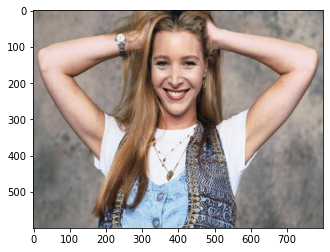

In [26]:
test_image = cv2.imread('Images/test-data/gettyimages-143479380.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

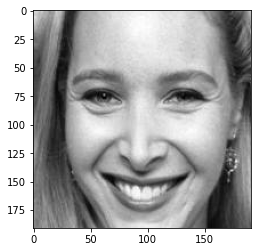

In [27]:
result = detect_face(test_image)
plt.imshow(result[0], cmap='gray')

In [28]:
#This will spider on training directory specifically arranged with label folder and corresponding training images.
#It takes a directory, extract label, read images, identify faces and assign labels
#Returns training data of gray scale images and corresponding labels
def prepare_training_data(folder_path):
    dirs = os.listdir(folder_path)
    faces = []
    labels = []
    for directory in dirs:
        if not directory.startswith("s"):
            continue
        label = int(directory[1:])
        subject_directory = folder_path+'/'+directory
        subject_image_names = os.listdir(subject_directory)
        
        for images in subject_image_names:
            if images.startswith('.'):
                continue
            image_path = subject_directory+'/'+images
            image = cv2.imread(image_path)
            cv2.waitKey(100)
            try:
                face, rect = detect_face(image)
                faces.append(face)
                labels.append(label)
            except:
                continue
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            cv2.destroyAllWindows()
    return faces, labels

In [64]:
#Prepare training data
t1 = time.time()
faces, labels = prepare_training_data('Images/training-data')
t2 = time.time()
delta = t2 - t1
print('Training data prepared in time: '+str(round(delta,2))+' seconds')
print('Faces Detected: ',len(faces))
print('Labels Assigned: ',len(labels))

Training data prepared in time: 36.32 seconds
Faces Detected:  79
Labels Assigned:  79


In [65]:
#Train the recognizer
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces,np.array(labels))

In [33]:
#For prediction detect multiple faces
def detect_faces(image_BGR):
    gray_image = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:/Users/danush.gokul/AppData/Local/Continuum/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    gray_faces=[]
    for face in faces:
        (x, y, w, h) = face
        gray_faces.append(gray_image[y:y+w, x:x+h])
    return gray_faces, faces

In [34]:
#Mark each face in image with rectangle
def mark_faces(image,rectangles):
    for rect in rectangles:
        (x, y, w, h) = rect
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [35]:
#Label each face recognized
def label_faces(image, labels, rectangles):
    for i in range(len(labels)):
        cv2.putText(image, labels[i], (rectangles[i][0], rectangles[i][1]-5), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [73]:
#Predict for an image
def predict(image):
    image_copy= image.copy()
    faces, rectangles = detect_faces(test_image)
    label_text = []
    for face in faces:
        label_text.append(subjects[face_recognizer.predict(face)[0]])
    mark_faces(image_copy,rectangles)
    label_faces(image_copy,label_text, rectangles)
    return image_copy        

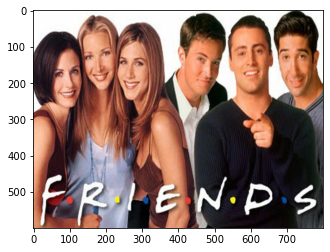

In [66]:
test_image = cv2.imread('Images/test-data/friends-cast-2.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

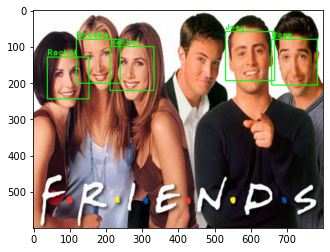

In [74]:
predicted_image = predict(test_image)

plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))